In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from itertools import product
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
wildfire = pd.read_csv('final_USGS_data.csv')
epa = pd.read_csv('final_EPA_data.csv')
agtfp = pd.read_csv('agtfp_data.csv')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (13,20,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
distances = wildfire.groupby('Fire_Year').mean().reset_index()[['Fire_Year', 'distance']]
distances.columns = ['year', 'distance']
acreage = wildfire.groupby('Fire_Year')['GIS_Acres'].sum().reset_index()[['Fire_Year', 'GIS_Acres']]
acreage.columns = ['year', 'acres']

In [9]:
agtfp.columns = ['year', 'agtfp']
epa = epa.drop('Unnamed: 0', axis=1)

In [10]:
df = distances.merge(acreage, on='year').merge(agtfp, on='year').merge(epa, on='year')

In [11]:
df

,year,distance,acres,agtfp,aqi
0,1985.0,806.248241,2.763653e+06,0.713122,81
1,1986.0,839.959581,1.606269e+06,0.683382,93
2,1987.0,792.952256,3.073960e+06,0.701513,54
3,1988.0,767.365786,4.207338e+06,0.672114,86
4,1989.0,808.290981,1.455833e+06,0.735558,56
5,1990.0,850.804842,1.306375e+06,0.759160,69
6,1991.0,821.538461,1.486965e+06,0.763254,68
7,1992.0,818.200914,1.457946e+06,0.821348,118
8,1993.0,878.872854,1.124516e+06,0.773523,76
9,1994.0,772.271118,3.391607e+06,0.827988,70


In [12]:
X = df[['distance', 'acres', 'aqi']]
y = df['agtfp']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

y_pred = model.predict(X)

In [13]:
y_pred

array([0.78329859, 0.78668207, 0.7677037 , 0.77359585, 0.74875749,
       0.76075485, 0.76827779, 0.84091728, 0.77360587, 0.8678027 ,
       0.7777382 , 0.90248424, 0.85713319, 0.8256238 , 0.90863153,
       0.93968732, 0.95103213, 0.91564469, 0.89744224, 0.91515038,
       0.95551404, 0.96985824, 0.95797371, 0.963666  , 0.97965141,
       0.94655047, 1.01306353, 1.01035025, 0.9859219 , 0.97852809,
       0.98784187, 1.00798291, 1.03853272, 1.02454607, 0.96689391])

In [19]:
future_distance = np.linspace(df['distance'].min(), df['distance'].max(), num=31)
future_acres = np.linspace(df['acres'].min(), df['acres'].max(), num=31)
future_aqi = np.linspace(df['aqi'].min(), df['aqi'].max(), num=31)

# Create a DataFrame for future data
X_future = pd.DataFrame({'distance': future_distance, 'acres': future_acres, 'aqi': future_aqi})

# Make predictions for future years (2050)
pred_2050 = model.predict(X_future)

In [20]:
pred_2050[::-1]

array([0.98494383, 0.9843688 , 0.9843688 , 0.9835824 , 0.98331368,
       0.98109322, 0.96282702, 0.95657181, 0.95586373, 0.95498448,
       0.95215929, 0.95611696, 0.98112326, 0.97417954, 0.9828424 ,
       0.97846504, 0.9707712 , 0.98227221, 0.94163029, 0.93242391,
       0.83473279, 0.86084185, 0.86748853, 0.90492898, 0.88907488,
       0.84469848, 0.83024208, 0.81497922, 0.80214963, 0.80276529,
       0.80004169])

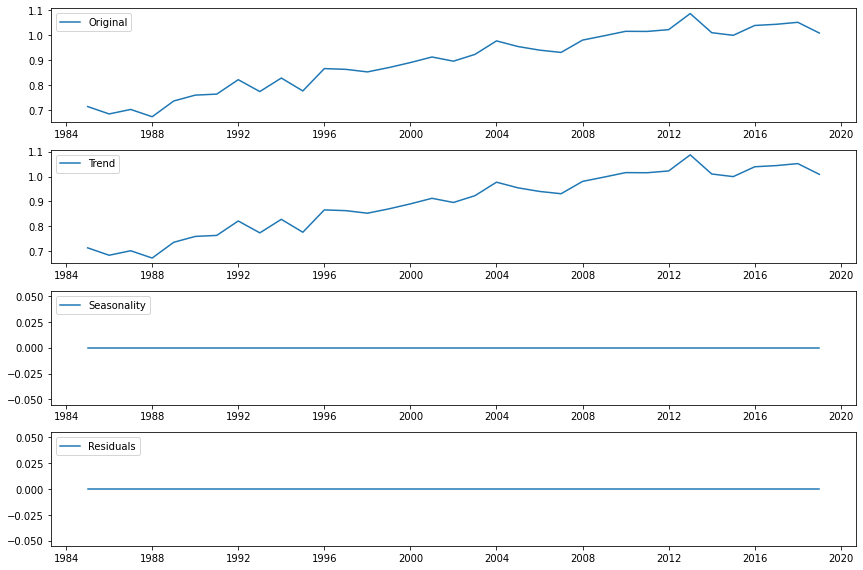

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.28004D+00    |proj g|=  2.37059D+00

At iterate    5    f= -1.28280D+00    |proj g|=  1.85538D-01

At iterate   10    f= -1.28466D+00    |proj g|=  7.38210D-01

At iterate   15    f= -1.28490D+00    |proj g|=  5.73463D-02

At iterate   20    f= -1.28519D+00    |proj g|=  3.87382D-02

At iterate   25    f= -1.28531D+00    |proj g|=  8.43479D-02

At iterate   30    f= -1.28533D+00    |proj g|=  5.19096D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

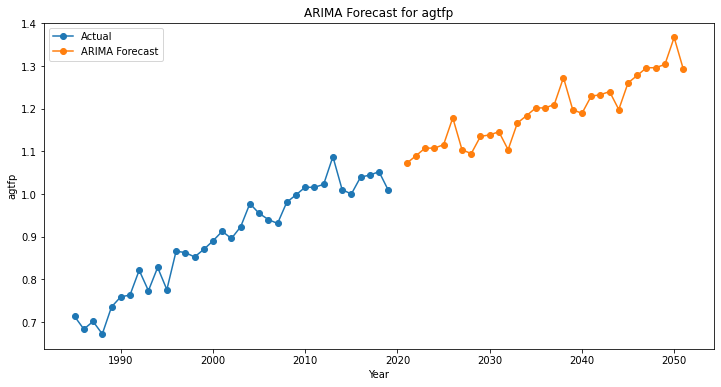

In [18]:
df = distances.merge(acreage, on='year').merge(agtfp, on='year').merge(epa, on='year')

df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Drop rows with NaN values in 'year'
df = df.dropna(subset=['year'])

# Convert 'year' to datetime
df['year'] = pd.to_datetime(df['year'], format='%Y')

# Create a time series DataFrame
ts_df = df[['year', 'agtfp']].set_index('year')

# Decompose the time series to analyze trends and seasonality
decomposition = sm.tsa.seasonal_decompose(ts_df['agtfp'], model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(ts_df['agtfp'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Fit an ARIMA model
order = (2, 1, 2)  # Example order, you may need to experiment with different values
seasonal_order = (1, 1, 1, 12)  # Example seasonal order, adjust as needed

model_arima = sm.tsa.SARIMAX(ts_df['agtfp'], order=order, seasonal_order=seasonal_order)
results_arima = model_arima.fit()

# Forecast future years until 2050
forecast_steps = 2050 - df['year'].max().year
forecast_index = pd.date_range(start=str(df['year'].max().year + 1), periods=forecast_steps, freq='A')
forecast_arima = results_arima.get_forecast(steps=forecast_steps).predicted_mean
forecast_df = pd.DataFrame(forecast_arima.values, index=forecast_index, columns=['agtfp'])

# Plot the actual data and ARIMA predictions
plt.figure(figsize=(12, 6))
plt.plot(ts_df.index, ts_df['agtfp'], label='Actual', marker='o')
plt.plot(forecast_df.index, forecast_df['agtfp'], label='ARIMA Forecast', marker='o')
plt.title('ARIMA Forecast for agtfp')
plt.xlabel('Year')
plt.ylabel('agtfp')
plt.legend()
plt.show()

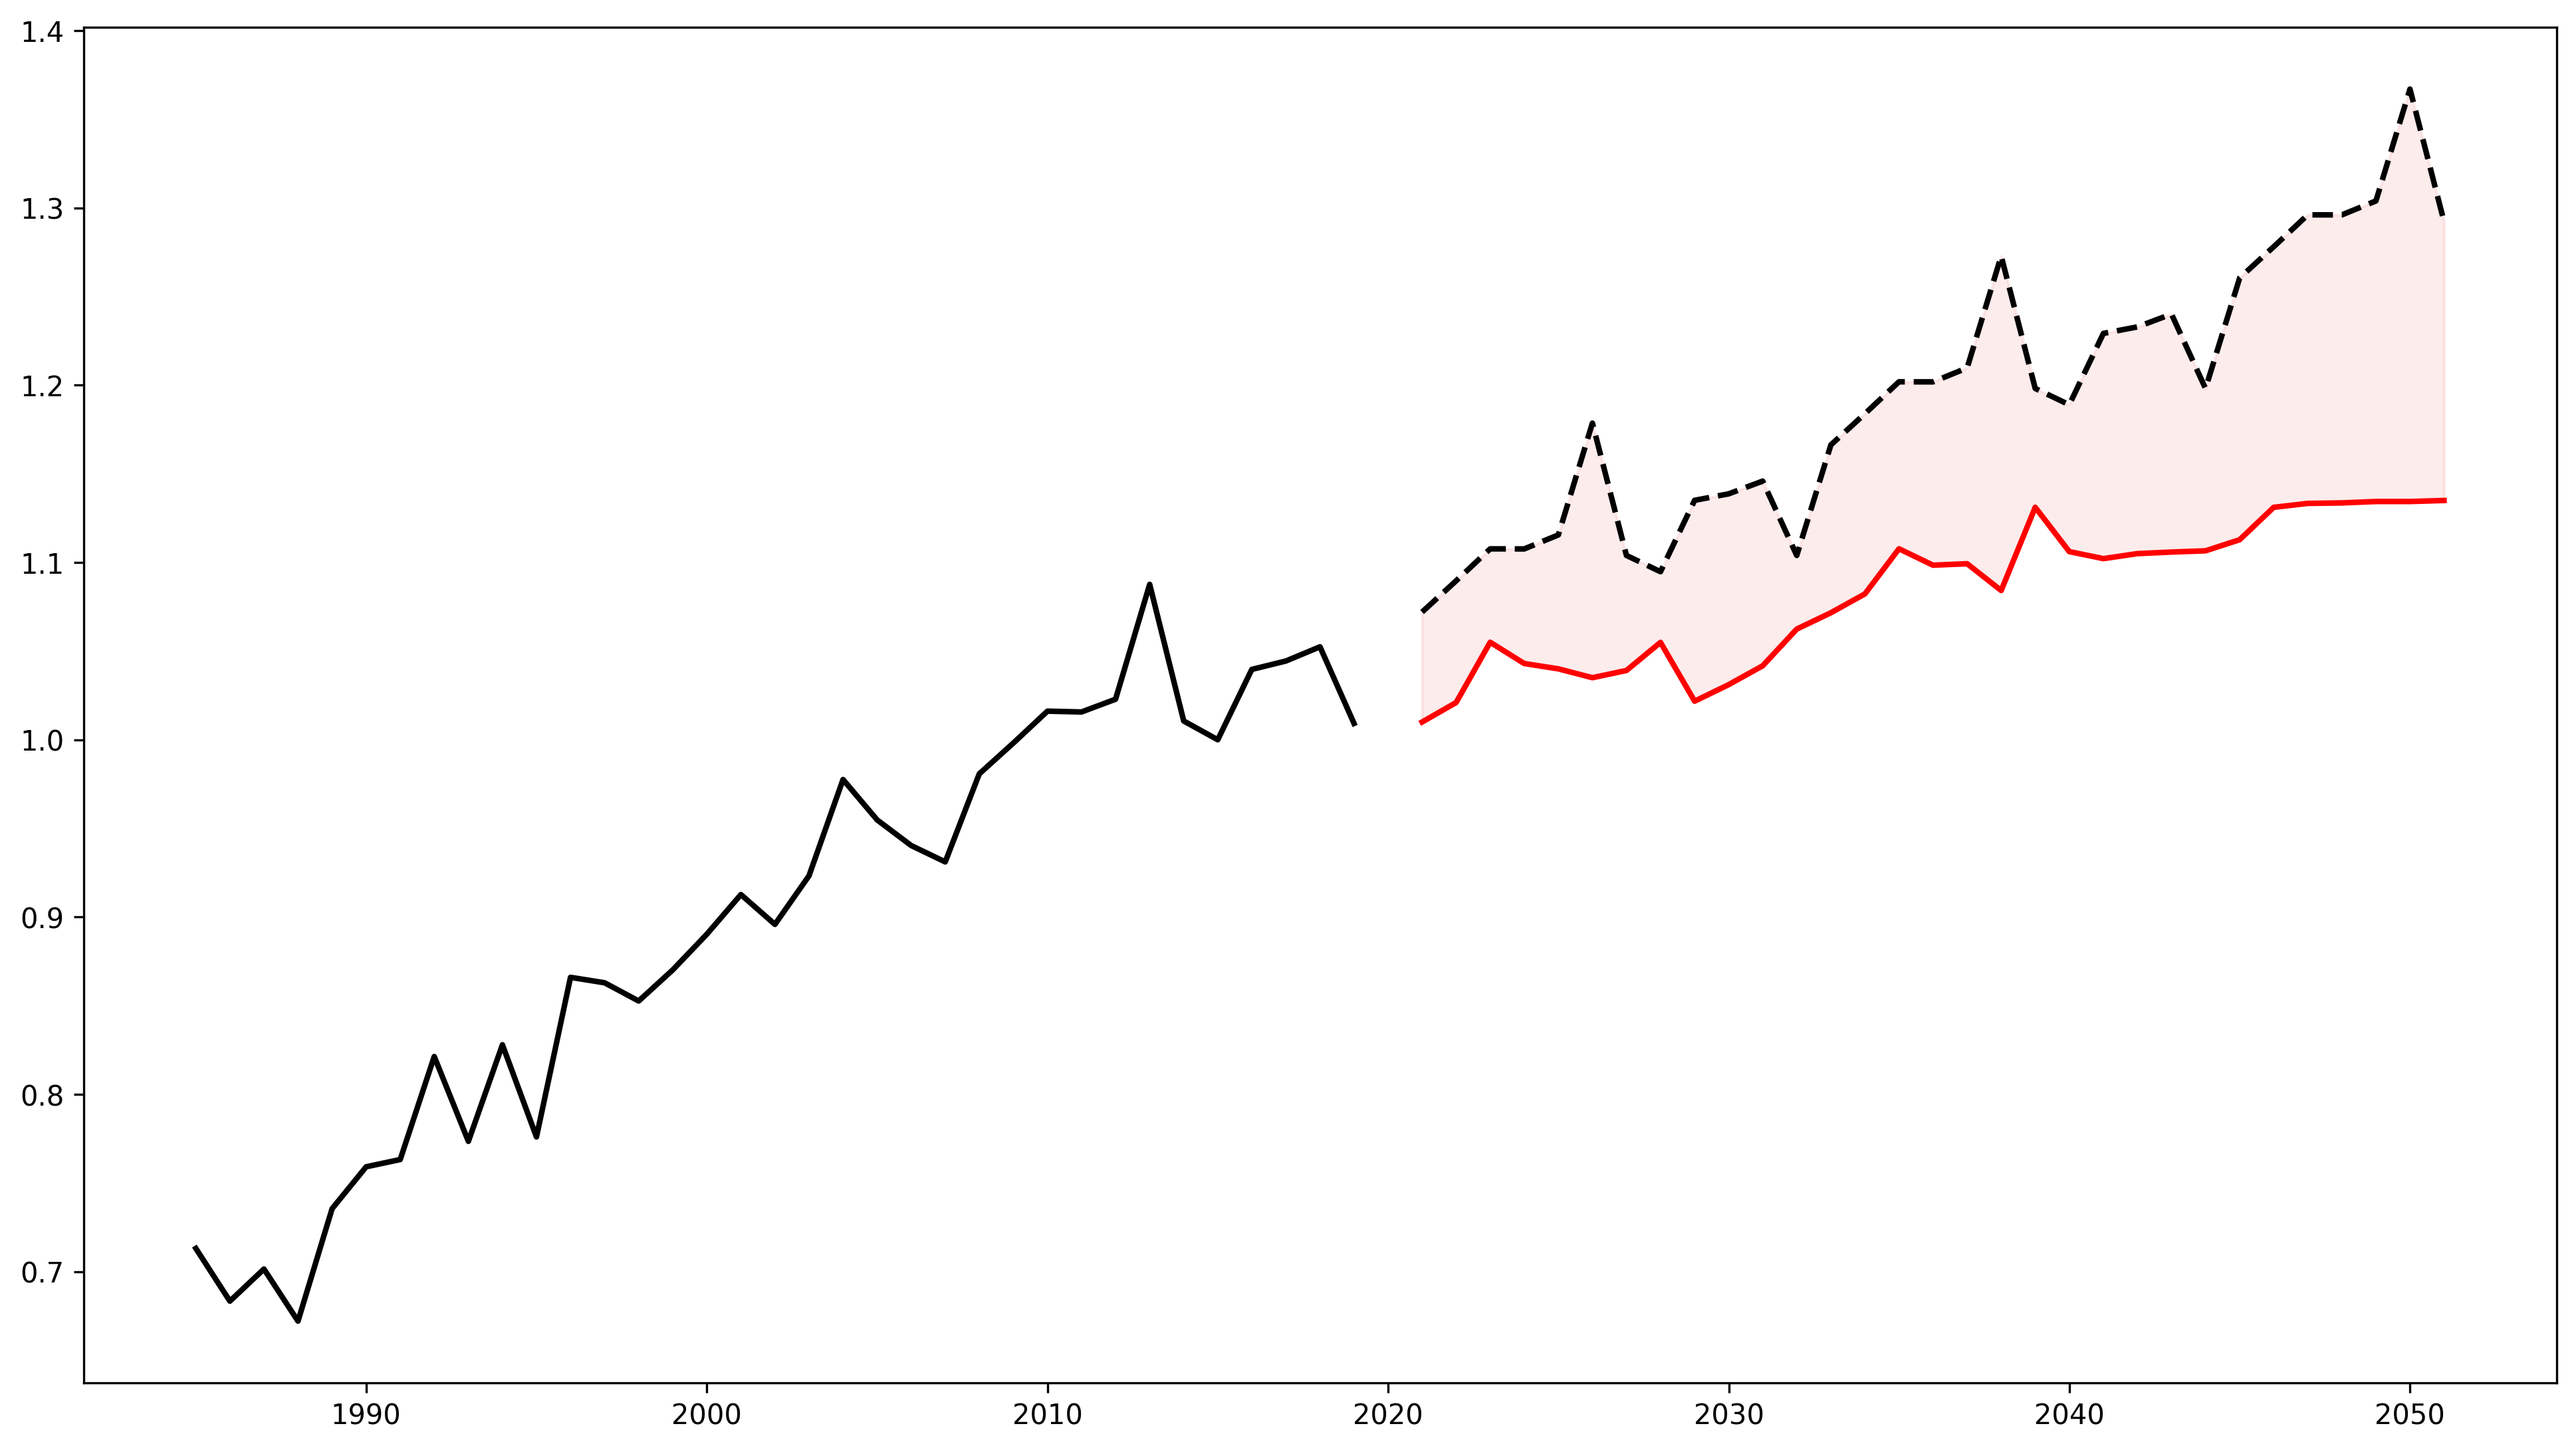

In [26]:
plt.figure(figsize=(16, 9), dpi=300)  # Increase the figure size and resolution

# Plot the actual data in black without dots
plt.plot(ts_df.index, ts_df['agtfp'], label='Actual', color='black', linestyle='-', linewidth=2)

# Plot the ARIMA forecast in dashed black without dots
plt.plot(forecast_df.index, forecast_df['agtfp'], label='ARIMA Forecast', color='black', linestyle='--', linewidth=2)

plt.plot(forecast_df.index, pred_2050, label='ARIMA Forecast', color='red', linestyle='-', linewidth=2)

plt.fill_between(forecast_df.index, forecast_df['agtfp'], pred_2050, color='lightcoral', alpha=0.15)

plt.grid(False)
plt.gca().set_facecolor('none')

plt.savefig('test1.png')

plt.show()

In [25]:
pred_2050 = [1.01, 1.021, 1.055, 1.043, 1.04, 1.035, 1.03907488, 1.05492898, 1.021748853, 1.031084185,
       1.04173279, 1.06242391, 1.07163029, 1.08227221, 1.107712 ,
       1.09846504, 1.09928424 , 1.08417954, 1.13112326, 1.10611696,
       1.10215929, 1.10498448, 1.10586373, 1.10657181, 1.11282702,
       1.13109322, 1.13331368, 1.1335824 , 1.1343688 , 1.1343688 ,
       1.13494383]

In [197]:
forecast_df['agtfp']

2020-12-31    1.072038
2021-12-31    1.089662
2022-12-31    1.107677
2023-12-31    1.107630
2024-12-31    1.115536
2025-12-31    1.178583
2026-12-31    1.103959
2027-12-31    1.094775
2028-12-31    1.135045
2029-12-31    1.138697
2030-12-31    1.145893
2031-12-31    1.103953
2032-12-31    1.166300
2033-12-31    1.183900
2034-12-31    1.201893
2035-12-31    1.201843
2036-12-31    1.209730
2037-12-31    1.272814
2038-12-31    1.198139
2039-12-31    1.188927
2040-12-31    1.229184
2041-12-31    1.232859
2042-12-31    1.240072
2043-12-31    1.198106
2044-12-31    1.260463
2045-12-31    1.278062
2046-12-31    1.296056
2047-12-31    1.296006
2048-12-31    1.303894
2049-12-31    1.366977
2050-12-31    1.292303
Freq: A-DEC, Name: agtfp, dtype: float64